### Project 4: Team 5


In this notebook we looked at Convolutional neural networks for doing classification on bird species

In [1]:
# Imports

# Visualization
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data and maths
import numpy as np
import pandas as pd
import random

# ML
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the data from google drive
# from google.colab import drive
# drive.mount('/content/drive')

# To unzip on colab
# !unzip "/content/drive/My Drive/project4/data.zip" -d "/content"

Mounted at /content/drive


In [2]:
# Load the saved model
model = keras.models.load_model('model')

In [2]:
# List of the selected classes
classes = ['ABBOTTS BABBLER','BELTED KINGFISHER','COPPERY TAILED COUCAL','EASTERN TOWEE','FAN TAILED WIDOW','GOLDEN EAGLE','HARLEQUIN QUAIL','INCA TERN','JAPANESE ROBIN','KING EIDER','LAUGHING GULL','MALLARD DUCK',
'NORTHERN FLICKER','OSPREY','PUFFIN']

In [3]:
# train, test and validation filepaths
train_path = 'data/train/'
test_path = 'data/test/'
valid_path = 'data/valid/'

# preprocess train, test and valid data
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) \
    .flow_from_directory(directory=train_path,
                         target_size=(224, 224),
                         color_mode="rgb",
                         batch_size=32,
                         class_mode="categorical",
                         classes=classes,
                         shuffle=True,
                         seed=42)

test = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1./255) \
    .flow_from_directory(directory=test_path,
                         target_size=(224, 224),
                         color_mode="rgb",
                         batch_size=32,
                         class_mode="categorical",
                         classes=classes,
                         shuffle=False,
                         seed=42)

valid = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1./255) \
    .flow_from_directory(directory=valid_path,
                         target_size=(224, 224),
                         color_mode="rgb",
                         batch_size=32,
                         class_mode="categorical",
                         classes=classes,
                         shuffle=True,
                         seed=42)

Found 2358 images belonging to 15 classes.
Found 75 images belonging to 15 classes.
Found 75 images belonging to 15 classes.


### Model description

This part defines a convolutional neural network (CNN) model using Keras. Our model consists of the following: two convolutional layers, two max-pooling layers, a flatten layer, a dropout layer, and a fully connected output layer with a softmax activation function. The convolutional layers learn the model's parameters. Max pooling layers reshape data coming out of one layer before it goes into the next. This helps boost the model's training time (by shrinking the data). The flatten layer performs further data reshaping before feeding the data into the fully connected layer. This is done by making the data 1-dimensional. The dropout layer is the model's output layer. As for our chosen activation functions, we used RELU activations methods for our hidden layers and results matched what we predicted so we kept it in our model. Softmax activation method was the best choice for the last layer since it helps output probability ratios.

In [4]:
# CNN model
num_classes = 15 # Defining number of classes
input_shape = (224,224,3) # Defining input shape

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # 32 filters with size 3 by 3 each
        layers.MaxPooling2D(pool_size=(2, 2)), # Dimensionality reduction (convolutional layer 1)
        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # 64 filters with size 3 by 3 each
        layers.MaxPooling2D(pool_size=(2, 2)), # Dimensionality reduction (convolutional layer)
        
        layers.Flatten(), # Dimensionality reduction (feature map)
        layers.Dropout(0.5), # Output layer
        layers.Dense(num_classes, activation="softmax"), # Accepts 1D array (fully connected layer)
    ])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [6]:
# Compile 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# Train
model.fit(train, validation_data=valid, verbose =1, epochs=25)

Epoch 1/25
74/74 [==============================] - 43s 568ms/step - loss: 2.0870 - accuracy: 0.3732 - val_loss: 1.0869 - val_accuracy: 0.6800
Epoch 2/25
74/74 [==============================] - 42s 567ms/step - loss: 1.1672 - accuracy: 0.6578 - val_loss: 0.8765 - val_accuracy: 0.7200
Epoch 3/25
74/74 [==============================] - 44s 588ms/step - loss: 0.8998 - accuracy: 0.7252 - val_loss: 0.8831 - val_accuracy: 0.7200
Epoch 4/25
74/74 [==============================] - 44s 596ms/step - loss: 0.7499 - accuracy: 0.7748 - val_loss: 0.6963 - val_accuracy: 0.8133
Epoch 5/25
74/74 [==============================] - 44s 589ms/step - loss: 0.6542 - accuracy: 0.8075 - val_loss: 0.6025 - val_accuracy: 0.8133
Epoch 6/25
74/74 [==============================] - 43s 580ms/step - loss: 0.5385 - accuracy: 0.8380 - val_loss: 0.6128 - val_accuracy: 0.8267
Epoch 7/25
74/74 [==============================] - 43s 581ms/step - loss: 0.4963 - accuracy: 0.8465 - val_loss: 0.8262 - val_accuracy: 0.7867

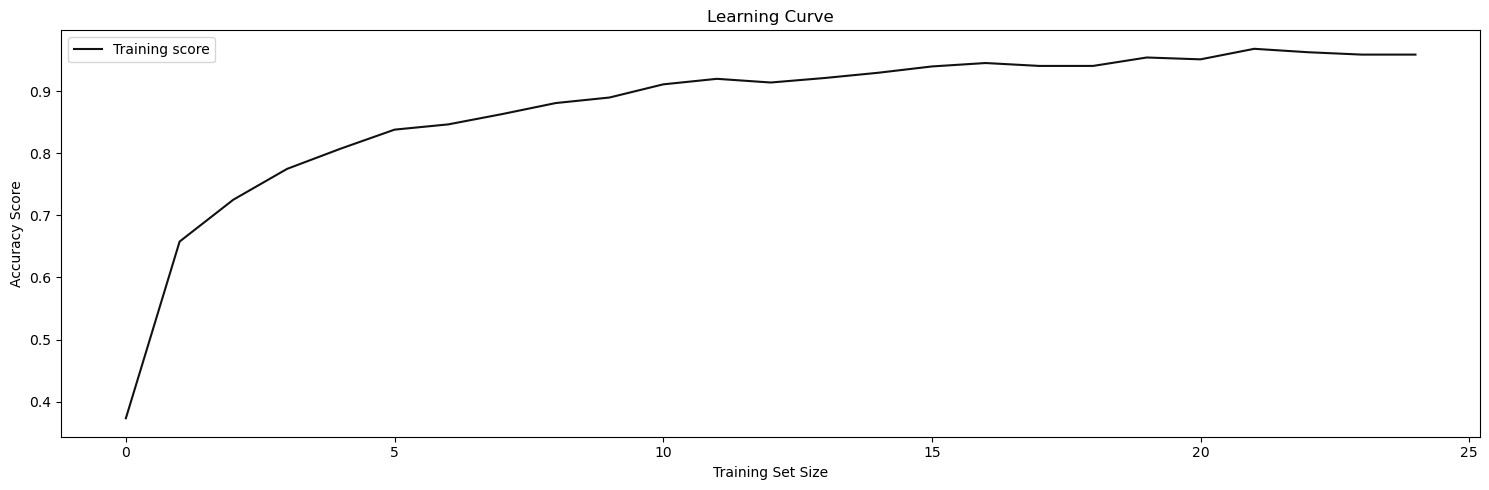

In [8]:
# Learning curve plot
plt.subplots(1, figsize=(15,5))
plt.plot(model.history.history['accuracy'], color="#111111",  label="Training score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

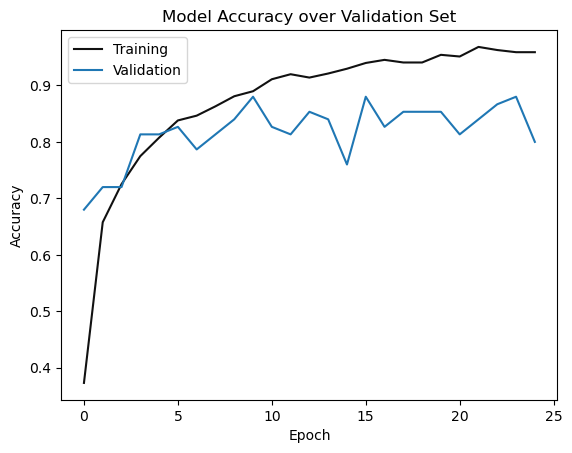

In [9]:
# Accuracy over validation set
plt.plot(model.history.history['accuracy'], color="#111111",  label="Training score")
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy over Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

In [10]:
# Testing the model
y_actual = test.labels
pred = model.predict(test)
y_pred = np.argmax(pred,axis=1)

3/3 [==============================] - 0s 79ms/step


In [11]:
# Evaluating the model
model.evaluate(test)

3/3 [==============================] - 0s 71ms/step - loss: 1.0940 - accuracy: 0.8133


[1.0940320491790771, 0.8133333325386047]

In [12]:
# Confusion matrix and classification report
print(confusion_matrix(y_actual,y_pred))
print(classification_report(y_actual,y_pred))

[[2 0 0 0 0 1 2 0 0 0 0 0 0 0 0]
 [0 3 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 4 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.60      0.75         5
           2       1.00      0.80      0.89         5
           3       0.80      0.80      0.80         5
           4       0.67      0.40      0.50         5
           5       0.50      0.80      0.62         5
           6       0.45      1.00      0.62         5
           7       1.00      0.80      0.89         5
           8     

<Axes: >

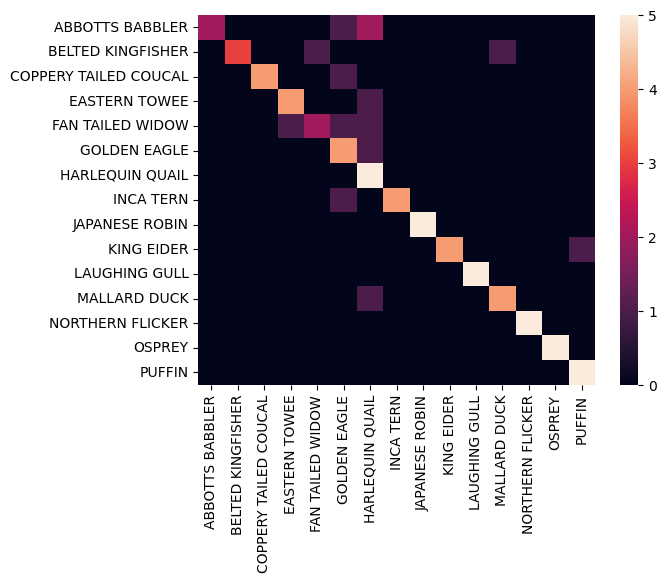

In [13]:
# Correlation heatmap for correct predictions
sns.heatmap(confusion_matrix(y_actual, y_pred), yticklabels=classes, xticklabels=classes)

In [14]:
# Running the validation set through the model
y_actual = valid.labels
pred = model.predict(valid)
y_pred = np.argmax(pred,axis=1)

3/3 [==============================] - 0s 71ms/step


In [15]:
model.evaluate(valid)

3/3 [==============================] - 0s 82ms/step - loss: 0.8818 - accuracy: 0.8000


[0.8817596435546875, 0.800000011920929]